In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from time import time
import math
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE


In [ ]:
train=pd.read_csv('mnist_train.csv')
# train=pd.read_csv('train.csv')
print(train.shape)

(60000, 785)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
train.sample(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
5879,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2489,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6314,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7114,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59977,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002100,0.007833,0.003600,0.000150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000267,0.000917,0.009283,0.024283,0.043717,0.06410,0.120133,...,3.534933,2.591817,1.701167,1.008600,0.540283,0.238400,0.075267,0.016167,0.000517,0.000983,0.0,0.0,0.0,0.0,0.0,0.0,0.002533,0.015583,0.041633,0.089200,0.128217,0.196733,0.336017,0.429967,0.525983,0.590683,0.688033,0.592067,0.482733,0.343517,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.475324,1.361189,0.881816,0.036742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065320,0.194636,1.055011,2.095113,2.962063,3.32388,4.869298,...,26.101169,22.251302,18.107058,13.897102,10.317854,6.552565,3.500306,1.241759,0.114964,0.240866,0.0,0.0,0.0,0.0,0.0,0.0,0.437527,1.721198,2.601220,4.032627,4.776047,6.177880,7.680724,9.093559,9.898373,10.431982,11.403013,10.517303,9.397896,8.057733,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
target=train['label']
train=train.drop("label", axis=1)
#x_train, x_test, y_train, y_test=train_test_split(X_train, Y_train, test_size=0.20, random_state=4)


In [ ]:
X=train.values
std=StandardScaler().fit_transform(X)
print(X.shape)

(60000, 784)


In [ ]:
mean=np.mean(std, axis=0)
covar=np.cov(std.T)
eig_values, eig_vectors=np.linalg.eig(covar)
#print(eig_values)
#print(eig_values.shape)
# print(eig_vectors.shape)

In [ ]:
# print(eig_values)
print(eig_vectors)
# print(eig_values.shape)
# print(eig_vectors.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
eig_pairs=[(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [ ]:
t=sum(eig_values)
var=[(i/t)*100 for i in sorted(eig_values, reverse=True)]
cumm_var=np.cumsum(var)
#print(t)
#print(var)
#print(cumm_var)

In [ ]:
n_components=30
pca=PCA(n_components=n_components).fit(train.values)
eigenvalues=pca.components_
eigenvalues=pca.components_.reshape(n_components, 28, 28)

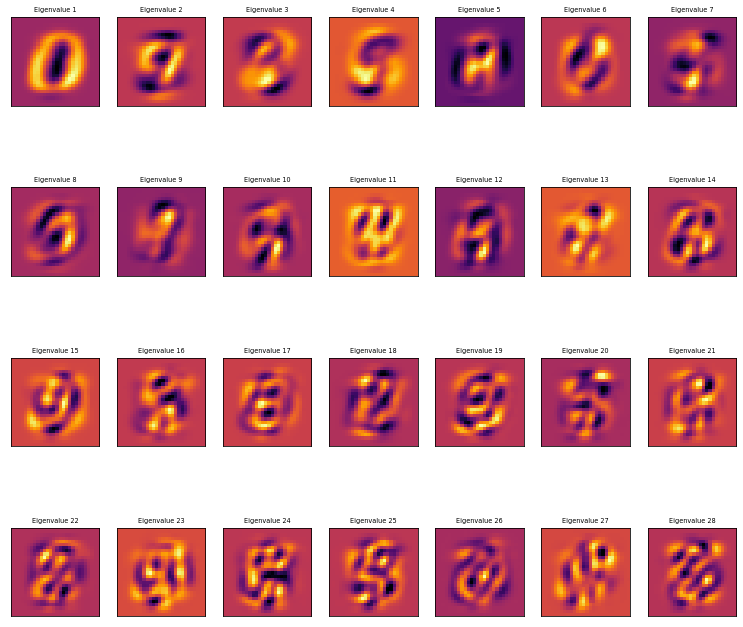

In [ ]:
n=4
m=7
plt.figure(figsize=(13,12))
for i in list(range(n*m)):
#     for offset in [10, 30,0]:
#     plt.subplot(n_row, n_col, i + 1)
    offset =0
    plt.subplot(n, m, i + 1)
    plt.imshow(eigenvalues[i].reshape(28,28), cmap='inferno')
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())
plt.show()

In [ ]:
del X

In [ ]:
X=train[:6000].values
del train
X_std=StandardScaler().fit_transform(X)
pca=PCA(n_components=16)
pca.fit(X_std)
X_5d=pca.transform(X_std)
Target=target[:6000]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans=KMeans(n_clusters=9)
X_clustered=kmeans.fit_predict(X_5d)

---------------------------------------


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train=pd.read_csv('mnist_train.csv')
print(train.shape)

(60000, 785)


In [ ]:
y=train['label']
x=train.drop("label", axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


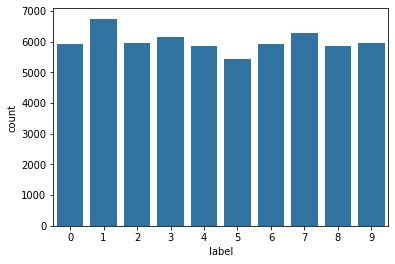

In [ ]:
sns.countplot(target, color=sns.color_palette()[0])

In [ ]:
def display(n):
  if n%10==0 and n<=100:
    for i in range(0, n):
      plt.subplot(n/10, 10, i+1)
      mat_data = x.iloc[i].values.reshape(28,28)
      plt.imshow(mat_data)
      plt.xticks([])
      plt.yticks([])
    

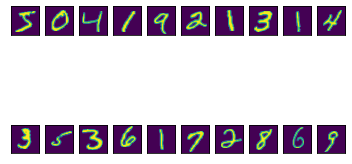

In [ ]:
display(20)

In [ ]:
def display_digit(n):
  if n in list(range(10)):
    i=np.where(y==n)
    for j in range(0, 50):
      plt.subplot(5, 10, j+1)
      mat_data = x.iloc[i[0][j]].values.reshape(28,28)
      plt.imshow(mat_data) 
      plt.xticks([]) 
      plt.yticks([])

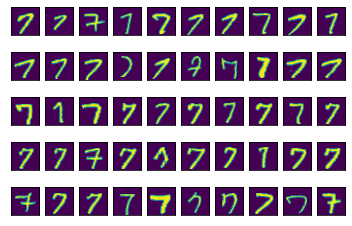

In [ ]:
display_digit(7)

In [ ]:
def classifier(x, y, print_output=True):
  X_train, X_test, Y_train, Y_test=train_test_split(x, y, test_size=0.20, random_state=4)
  clf=RandomForestClassifier(n_estimators=100)
  clf.fit(X_train, Y_train)
  pred=clf.predict(X_test)
  acc=accuracy_score(Y_test, pred)
  if print_output==True:
    matrix=confusion_matrix(Y_test, pred)
    sns.heatmap(matrix, annot=True, cmap='inferno', linewidths=.5)

    print('Input Shape: {}'.format(X_train.shape))
    print('Accuracy: {:2.2%}\n'.format(acc))
    print(matrix)
  return acc

Input Shape: (48000, 784)
Accuracy: 96.78%

[[1184    0    1    0    0    2    4    0    5    1]
 [   0 1318   11    1    3    1    0    8    0    0]
 [   5    1 1203    5    5    1    2    9   11    3]
 [   3    0   14 1165    0   19    0   10    9    5]
 [   1    2    2    0 1095    0    7    2    3   14]
 [   3    1    1   16    0 1041    8    0   12    6]
 [   5    0    0    0    1   10 1153    0    3    0]
 [   2    5    8    3    5    0    0 1243    3   11]
 [   0    7    6   11    6    4    3    1 1117   13]
 [   2    3    3    9   15    3    2   12   14 1094]]


0.96775

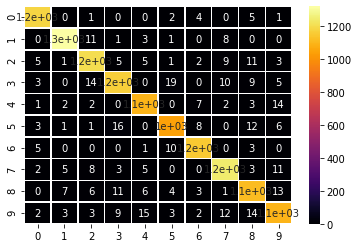

In [ ]:
classifier(x, y)

In [ ]:
def pca_fn(n_components, data):
  X=StandardScaler().fit_transform(data)
  pca=PCA(n_components)
  X_pca=pca.fit_transform(X)
  return pca, X_pca

Input Shape: (48000, 2)
Accuracy: 31.64%

[[ 759    1  167   50   33   36  119    3   25    4]
 [   0 1120    3    9   16   29   13   46   34   72]
 [ 197    3  267  160  119  120  169   50   90   70]
 [  64   21  193  147  140  141  142  117  135  125]
 [  37   47  131  138  173  106  109  134   91  160]
 [  67   29  125  118  100  196  171   39  181   62]
 [ 156   39  185  103   79  177  239   31  118   45]
 [  10   73   60  125  132   48   41  433   93  265]
 [  42   53  117  142  113  169  145   83  199  105]
 [  13  122   59  102  155   53   66  233   90  264]]


0.3164166666666667

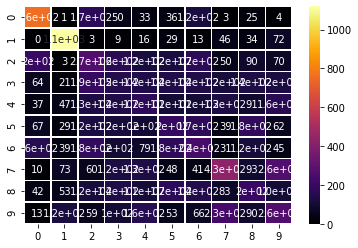

In [ ]:
pca, X_pca=pca_fn(2, x)
classifier(X_pca, y)

In [ ]:
X_pca[0][1]

-4.815282726533166

In [ ]:
y[501]

9

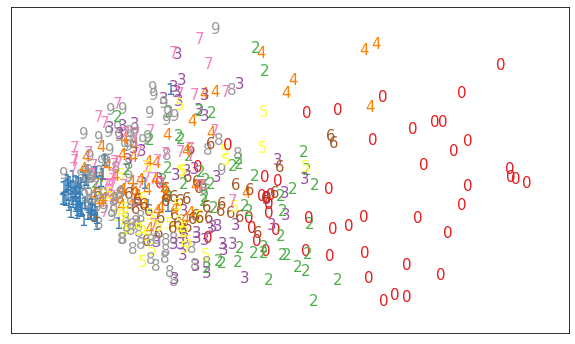

In [ ]:
def plot_components(x, y, size):
    x_min, x_max = np.min(x, 0), np.max(x, 0)
    x = (x - x_min) / (x_max - x_min)
    plt.figure(figsize=(10, 6))
    for i in range(size):
        # plt.text(x[i, 0], x[i, 1], str(y[i]),
        plt.text(x[i][0], x[i][1], str(y[i]), 
                 color=plt.cm.Set1(y[i]), 
                 fontdict={'size': 15})

    plt.xticks([]), plt.yticks([]), plt.ylim([-0.1,1.1]), plt.xlim([-0.1,1.1])
# plot_components(X_pca[:500], y[:500])
plot_components(X_pca[:500], y[:500], 500) #new change

In [ ]:
acc_list=[]
pc_list=[]
for pc in range(2, 101):
  pca, X_pca=pca_fn(pc, x)
  acc =classifier(X_pca, y, print_output=False)
  acc_list.append(acc)
  pc_list.append(pc)

Text(0, 0.5, 'acc')

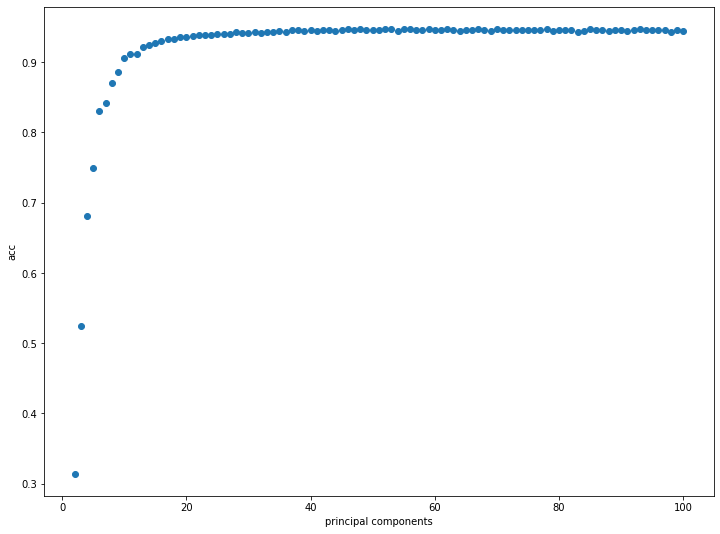

In [ ]:
plt.figure(figsize=[12,9])
plt.scatter(pc_list, acc_list)
plt.xlabel('principal components')
plt.ylabel('acc')

#Mnist Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
d0 = pd.read_csv('./mnist_train.csv') 
print(d0.head(5)) 

   label  1x1  1x2  1x3  1x4  1x5  ...  28x23  28x24  28x25  28x26  28x27  28x28
0      5    0    0    0    0    0  ...      0      0      0      0      0      0
1      0    0    0    0    0    0  ...      0      0      0      0      0      0
2      4    0    0    0    0    0  ...      0      0      0      0      0      0
3      1    0    0    0    0    0  ...      0      0      0      0      0      0
4      9    0    0    0    0    0  ...      0      0      0      0      0      0

[5 rows x 785 columns]


In [ ]:
print(l.head(10))

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
8    1
9    4
Name: label, dtype: int64


In [ ]:
print(d.shape)
print(d.shape[0])
print(d.shape[1])

(60000, 784)
60000
784


In [ ]:
print(l.shape)

(60000,)


In [ ]:
type(d.iloc[100])

pandas.core.series.Series

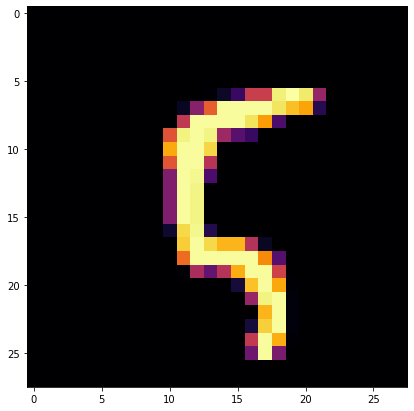

In [ ]:
plt.figure(figsize=(7,7))
idx = 100

# grid_data = d.iloc[idx].values().reshape(28,28)  # Transforming from 1D to 2D pixel array
## changes##
grid_data = np.array(d.iloc[idx]) 
grid_data = grid_data.reshape(28, 28)
plt.imshow(grid_data, interpolation = "none", cmap = "inferno") 
plt.show()

In [ ]:
print(format (idx ) , l[idx] )

100 5


#a) 2D visualization using PCA

In [ ]:
labels = l.head(15000)
data = d.head(15000)

In [ ]:
print(data.shape)

(15000, 784)


In [ ]:
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [ ]:
#Finding the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print (covar_matrix.shape)

(784, 784)


In [ ]:
# Finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dimensional space.

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [ ]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultaat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultaat new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [ ]:
# Appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new pandas data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -4.457050       0.960769    5.0
1      -7.397795      -8.658155    0.0
2       9.640690      -2.082854    4.0
3      -3.356074       7.187465    1.0
4       2.979880       4.933889    9.0


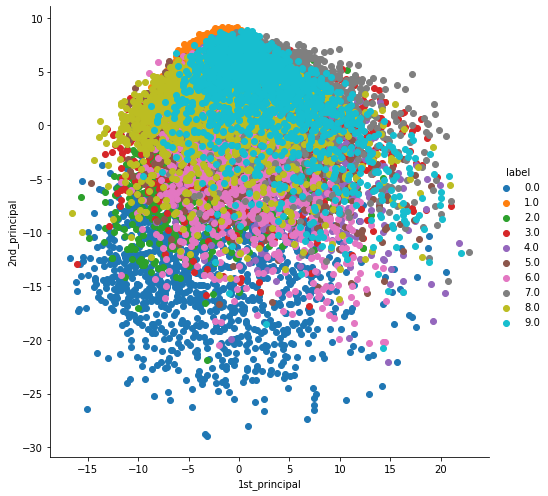

In [ ]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", height=7).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

#b) 2-D visualization using PCA by Scikit-Learn

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA()

In [ ]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


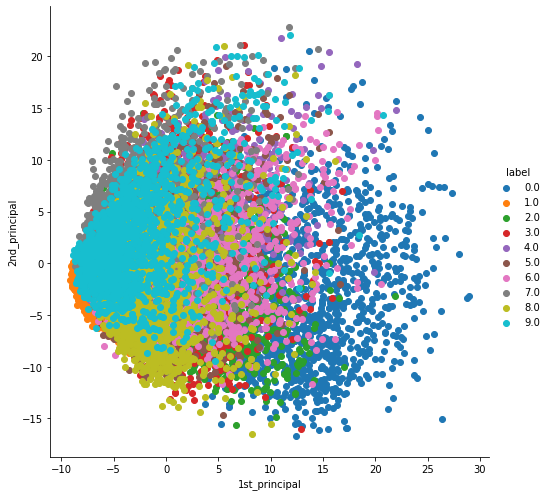

In [ ]:
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=7).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

#c) PCA for dimensionality reduction

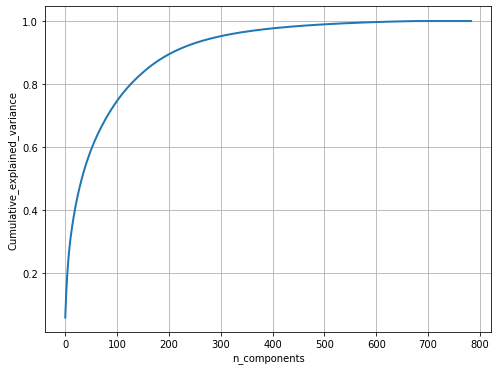

In [ ]:
# PCA for dimensionality redcution 

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(8, 6))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

#d) t-SNE for Dimensionality Redcution and Visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


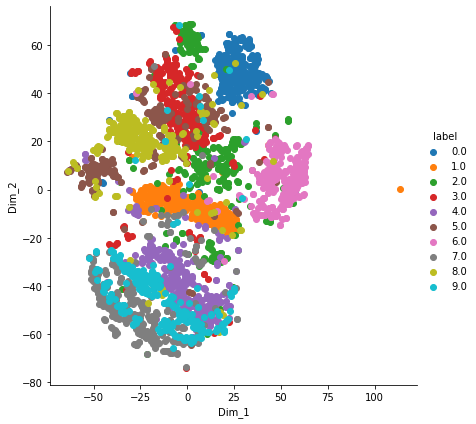

In [ ]:
# TSNE

from sklearn.manifold import TSNE

# Picking the top 3000 points from the dataset of 15K points
data_3000 = standardized_data[0:3000,:]
labels_3000 = labels[0:3000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 3000

tsne_data = model.fit_transform(data_3000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_3000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


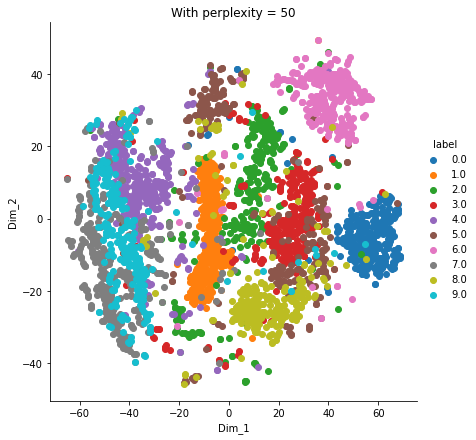

In [ ]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_3000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_3000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


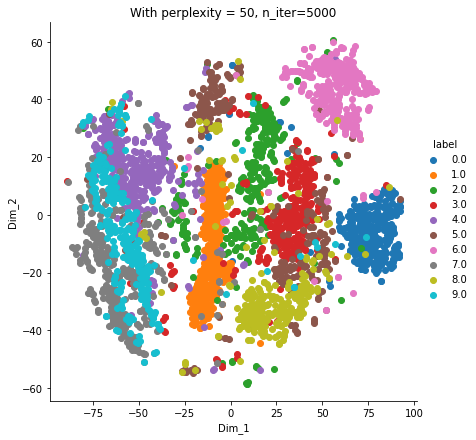

In [ ]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_3000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_3000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


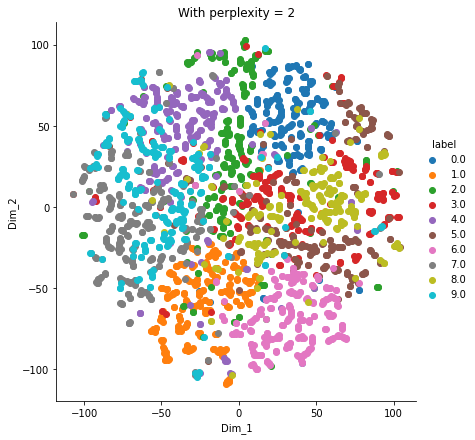

In [ ]:
model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data_3000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_3000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()